In [3]:
# importing all necessary libraries
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from xgboost import XGBClassifier
from sklearn import metrics    
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline


NameError: name 'getcwd' is not defined

In [6]:
import os
cwd = os.getcwd()
print("Path at terminal when executing this file")
print(os.getcwd() + "\n")

Path at terminal when executing this file
C:\Users\MY BOOK\Desktop\Capstone



In [7]:
# Reading csv file
df = pd.read_csv('credit_risk.csv')

In [8]:
#printing top 10 data elements of the dataframe
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,label
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
5,'no checking',36,'existing paid',education,9055,'no known savings','1<=X<4',2,'male single',none,...,'no known property',35,none,'for free',1,'unskilled resident',2,yes,yes,good
6,'no checking',24,'existing paid',furniture/equipment,2835,'500<=X<1000','>=7',3,'male single',none,...,'life insurance',53,none,own,1,skilled,1,none,yes,good
7,'0<=X<200',36,'existing paid','used car',6948,'<100','1<=X<4',2,'male single',none,...,car,35,none,rent,1,'high qualif/self emp/mgmt',1,yes,yes,good
8,'no checking',12,'existing paid',radio/tv,3059,'>=1000','4<=X<7',2,'male div/sep',none,...,'real estate',61,none,own,1,'unskilled resident',1,none,yes,good
9,'0<=X<200',30,'critical/other existing credit','new car',5234,'<100',unemployed,4,'male mar/wid',none,...,car,28,none,own,2,'high qualif/self emp/mgmt',1,none,yes,bad


In [9]:
#printing column names
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'label'],
      dtype='object')

In [10]:
print(df.dtypes)
print("-------------------------------------------*---------------------------------------")
print("Total count of the differnt datatypes are given below")
print(df.dtypes.value_counts())

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
label                     object
dtype: object
-------------------------------------------*---------------------------------------
Total count of the differnt datatypes are given below
object    14
int64      7
dtype: int64


## Checking for Null Values

In [11]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
label                     0
dtype: int64

## Value Encoding for label column

In [12]:
df['label'].replace(regex=True,inplace=True,to_replace=r'good',value=r'1')
df['label'].replace(regex=True,inplace=True,to_replace=r'bad',value=r'0')

In [13]:
df[['label']]=df[['label']].astype(int)
df.label.unique()

array([1, 0])

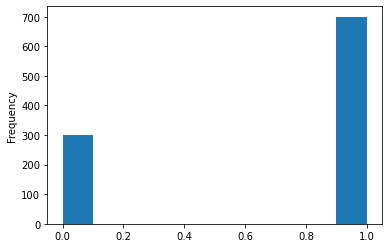

In [14]:
df['label'].astype(int).plot.hist();

In [15]:
# Number of unique classes in each object column
df.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

duration                   33
credit_amount             921
installment_commitment      4
residence_since             4
age                        53
existing_credits            4
num_dependents              2
dtype: int64

## Feature Selection 

In [16]:
df.num_dependents.value_counts()

1    845
2    155
Name: num_dependents, dtype: int64

In [17]:
# As we see that the number of classes in num_dependent column is highly imbalance therefore we will drop this column

In [18]:
df = df.drop(['num_dependents'],axis=1)

In [19]:
df.shape

(1000, 20)

In [20]:
df.existing_credits.value_counts()

1    633
2    333
3     28
4      6
Name: existing_credits, dtype: int64

In [21]:
df.residence_since.value_counts()

4    413
2    308
3    149
1    130
Name: residence_since, dtype: int64

In [22]:
df.installment_commitment.value_counts()

4    476
2    231
3    157
1    136
Name: installment_commitment, dtype: int64

In [23]:
df.duration.value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: duration, dtype: int64

### since all other numeric columns are having intrinsic ordering therefor we will keep these columns

### Now lets check for other columns with non numeric values 

In [24]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

checking_status         4
credit_history          5
purpose                10
savings_status          5
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
dtype: int64

In [25]:
cat = df.select_dtypes('object')

In [26]:
print(cat.checking_status.value_counts())
print("....................................................................")
print(cat.credit_history.value_counts())
print("....................................................................")
print(cat.purpose.value_counts())
print("....................................................................")
print(cat.savings_status.value_counts())
print("....................................................................")
print(cat.employment.value_counts())
print("....................................................................")
print(cat.other_parties.value_counts())
print("....................................................................")
print(cat.property_magnitude.value_counts())
print("....................................................................")
print(cat.other_payment_plans.value_counts())
print("....................................................................")
print(cat.housing.value_counts())
print("....................................................................")
print(cat.job.value_counts())
print("....................................................................")
print(cat.own_telephone.value_counts())
print("....................................................................")
print(cat.foreign_worker.value_counts())
print("....................................................................")


'no checking'    394
'<0'             274
'0<=X<200'       269
'>=200'           63
Name: checking_status, dtype: int64
....................................................................
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: credit_history, dtype: int64
....................................................................
radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9
Name: purpose, dtype: int64
....................................................................
'<100'                603
'no known savings'    183
'100<=X<500'          103
'500<=X<1000'          63
'>=1000'               48


we will drop foreign worker column as it is having very less number of type 2 values

In [27]:
cat = cat.drop(['foreign_worker'],axis=1)

# Encoding Categorical Variables

##### A machine learning model unfortunately cannot deal with categorical variables (except for some models such as LightGBM). Therefore, we have to find a way to encode (represent) these variables as numbers before handing them off to the model. There are two main ways to carry out this process:

#####  * Label encoding: assign each unique category in a categorical variable with an integer. No new columns are created. An example is shown below

#####  * One-hot encoding: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [28]:
cat_1hot = pd.get_dummies(cat)

In [29]:
non_cat = df.select_dtypes(exclude = 'object')

In [30]:
data_1hot = pd.concat([non_cat, cat_1hot], axis=1, join='inner')

In [31]:
data_1hot.head(5)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,label,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',...,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes
0,6,1169,4,4,67,2,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
1,48,5951,2,2,22,1,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,12,2096,2,3,49,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,42,7882,2,4,45,1,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0
4,24,4870,3,4,53,2,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [32]:
y = data_1hot['label']

In [33]:
x = data_1hot.drop(['label'],axis=1)

In [34]:
x.head(10)

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,checking_status_'0<=X<200',checking_status_'<0',checking_status_'>=200',checking_status_'no checking',...,other_payment_plans_stores,housing_'for free',housing_own,housing_rent,job_'high qualif/self emp/mgmt',job_'unemp/unskilled non res',job_'unskilled resident',job_skilled,own_telephone_none,own_telephone_yes
0,6,1169,4,4,67,2,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,12,2096,2,3,49,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
3,42,7882,2,4,45,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
4,24,4870,3,4,53,2,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0
5,36,9055,2,4,35,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
6,24,2835,3,4,53,1,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
7,36,6948,2,2,35,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
8,12,3059,2,4,61,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
9,30,5234,4,2,28,2,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns) 
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs', 'Score'] #naming the dataframe columns

In [36]:
print(featureScores.nlargest(10, 'Score')) #print 10 best features

                                              Specs         Score
1                                     credit_amount  58262.490007
0                                          duration    321.030795
9                     checking_status_'no checking'     63.002659
7                              checking_status_'<0'     48.450469
4                                               age     30.200309
11  credit_history_'critical/other existing credit'     23.344872
14             credit_history_'no credits/all paid'     20.119048
10                        credit_history_'all paid'     17.190476
29                savings_status_'no known savings'     13.645850
43           property_magnitude_'no known property'     13.377860


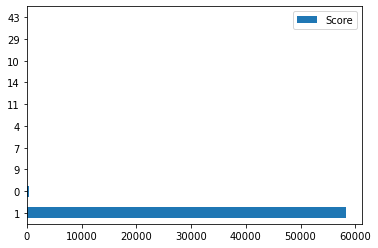

In [37]:
featureScores.nlargest(10, 'Score').plot(kind='barh')
plt.savefig('chi2.png')

[0.05202834 0.04859302 0.0329482  0.03359743 0.04061616 0.02009975
 0.02200313 0.03813763 0.00956608 0.0596003  0.01050536 0.02435063
 0.01110227 0.01694668 0.01253373 0.00218544 0.02012867 0.00949475
 0.0118658  0.00981315 0.01797982 0.00221202 0.01476307 0.00510788
 0.00133385 0.01102792 0.00672335 0.02360002 0.00669711 0.01656377
 0.02005783 0.01544715 0.01665307 0.01804089 0.01106603 0.01932464
 0.00976592 0.009545   0.01998001 0.0084115  0.01000885 0.01201161
 0.01688419 0.01357352 0.01922096 0.01793144 0.01751854 0.01933818
 0.00812518 0.00839638 0.01639901 0.01233418 0.01573272 0.00312788
 0.01536596 0.02044066 0.0169598  0.01621359]


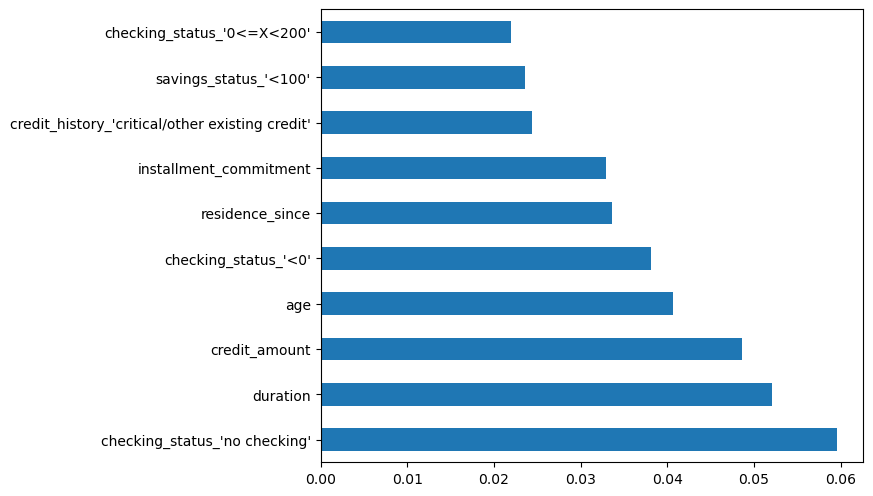

In [38]:
###Feature Importance 
###It gives a score for each feature of data,the higher the score more important or relevants is the feature towards your output variable.
###Its an inbuilt class that comes with Tree based classifiers, we will be using extra tree Classifier for extacting the top features for the dataset.
### as we can see credit_amount has the most highest score among all the features.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
plt.figure(figsize=(7, 6), dpi=100)
#plot graph of features importances for better visulization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.savefig('extra.png',dpi=100)
plt.show()

## Train-Test split

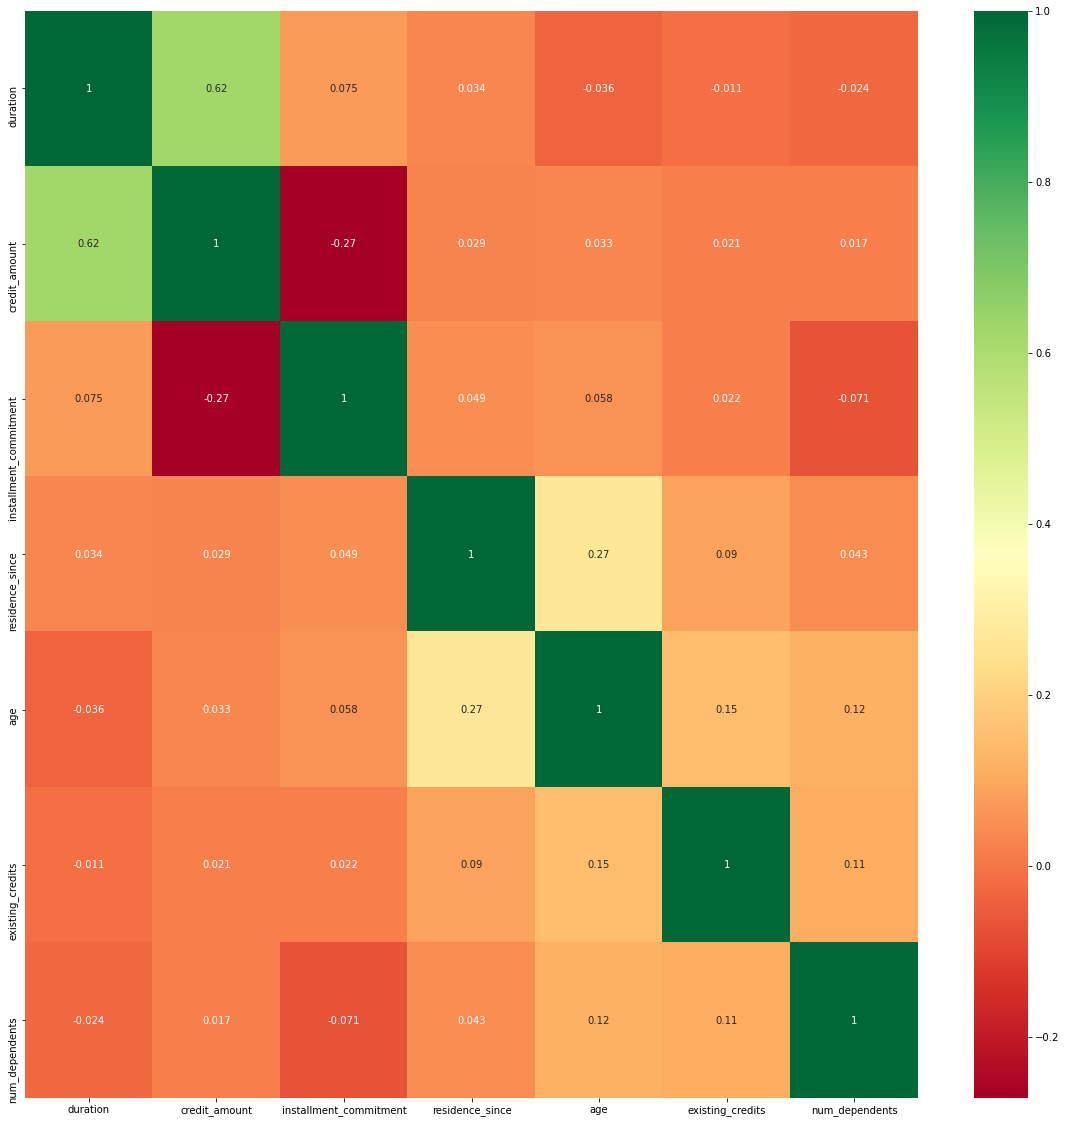

In [39]:
import seaborn as sns
#get correlations of each features in dataset
data = pd.read_csv("credit_risk.csv")
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.savefig('heatmap.png')
## credit_amount has quite strong relationship with duration.

In [40]:
# Determine number of bad cases in dataset

bad = df[df['label'] == 0]
good = df[df['label'] == 1]

outlier_fraction = len(bad)/float(len(good))
print(outlier_fraction)

print('bad: {}'.format(len(df[df['label'] == 0])))
print('good: {}'.format(len(df[df['label'] == 1])))

0.42857142857142855
bad: 300
good: 700


In [41]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(x),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [42]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(bad)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(x)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(x)
        scores_pred = clf.decision_function(x)
        y_pred = clf.predict(x)
    
    # Reshape the prediction values to 1 for good, 0 for bad. 
    y_pred[y_pred == 1] = 1
    y_pred[y_pred == -1] = 0
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Isolation Forest: 419
0.581
              precision    recall  f1-score   support

           0       0.36      0.52      0.43       300
           1       0.75      0.61      0.67       700

    accuracy                           0.58      1000
   macro avg       0.55      0.56      0.55      1000
weighted avg       0.63      0.58      0.60      1000

Local Outlier Factor: 485
0.515
              precision    recall  f1-score   support

           0       0.28      0.41      0.33       300
           1       0.69      0.56      0.62       700

    accuracy                           0.52      1000
   macro avg       0.49      0.48      0.48      1000
weighted avg       0.57      0.52      0.53      1000



<Figure size 648x504 with 0 Axes>

In [43]:
### Performing PCA therefore we are rescaling data in order to measure the data on different scales.


In [44]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(x)
print (X_std[0:5])
print ("The shape of Feature Matrix is -",X_std.shape)

[[-1.23647786 -0.74513141  0.91847717  1.04698668  2.76645648  1.02707891
  -0.60662102  1.62776996 -0.25929878 -0.80632811 -0.22699055  1.55337352
  -0.31063037 -1.06191317 -0.20412415 -0.11020775 -0.55270519 -0.33886163
  -0.32774947 -0.22941573 -0.47010767 -0.11020775  1.60356745 -0.14998296
  -0.09529814 -0.33886163 -0.25929878 -1.23243324 -0.22454436  2.11293182
  -0.71614196 -0.45897032 -0.45577348  1.71830416 -0.25709547 -0.67028006
  -0.22941573 -0.31831052  0.90819465 -0.20676767 -0.23420572  0.32021217
  -0.54962108 -0.42665337  1.59565012 -0.70498652 -0.4017962   0.47801802
  -0.22207644 -0.3479601   0.63444822 -0.4669334  -0.41678402 -0.14998296
  -0.5         0.76635604 -1.21459768  1.21459768]
 [ 2.24819436  0.94981679 -0.87018333 -0.76597727 -1.19140394 -0.704926
   1.6484757  -0.61433742 -0.25929878 -0.80632811 -0.22699055 -0.64376017
  -0.31063037  0.94169658 -0.20412415 -0.11020775 -0.55270519 -0.33886163
  -0.32774947 -0.22941573 -0.47010767 -0.11020775  1.60356745 -

In [45]:
X_covariance_matrix = np.cov(X_std.T)

In [46]:
X_covariance_matrix

array([[ 1.001001  ,  0.62560981,  0.07482364, ...,  0.05506495,
        -0.16488309,  0.16488309],
       [ 0.62560981,  1.001001  , -0.27158729, ..., -0.09272917,
        -0.27727238,  0.27727238],
       [ 0.07482364, -0.27158729,  1.001001  , ...,  0.04266561,
        -0.01442731,  0.01442731],
       ...,
       [ 0.05506495, -0.09272917,  0.04266561, ...,  1.001001  ,
         0.06135023, -0.06135023],
       [-0.16488309, -0.27727238, -0.01442731, ...,  0.06135023,
         1.001001  , -1.001001  ],
       [ 0.16488309,  0.27727238,  0.01442731, ..., -0.06135023,
        -1.001001  ,  1.001001  ]])

In [47]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-2.18943456e-01 -7.73384696e-02  1.82195253e-01 ...  3.81267955e-17
  -4.88495308e-17  2.47095399e-17]
 [-2.74655742e-01 -1.21520526e-01  1.81321796e-01 ... -1.09220462e-16
   1.81837104e-17  1.61944724e-17]
 [-2.10428546e-02  1.06071235e-01 -7.30197678e-02 ... -2.44021863e-17
  -4.58554920e-17  5.85700167e-17]
 ...
 [ 7.43674971e-02  9.82183286e-02  1.75407960e-01 ...  1.82022331e-01
  -5.83830915e-01 -1.70669384e-01]
 [ 2.86040369e-01 -2.39944948e-02 -2.19455735e-01 ... -6.76503387e-02
  -3.23046142e-02  6.44361108e-01]
 [-2.86040369e-01  2.39944948e-02  2.19455735e-01 ... -6.76503387e-02
  -3.23046142e-02  6.44361108e-01]]

Eigenvalues 
[ 4.09985503e+00  2.88917658e+00  2.58807265e+00  2.44629160e+00
  2.09843371e+00  2.05467344e+00  2.01496767e+00  1.84615779e+00
  1.80950897e+00  2.35172273e-01  2.59027422e-01  1.65294399e+00
  4.37171823e-01  4.80007975e-01  1.56440956e+00  1.53105343e+00
  5.43102751e-01  1.47399020e+00  6.06045130e-01  1.37558987e+00
  1.3632053

In [48]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.099855030507092
2.889176580551363
2.588072650218911
2.44629160350994
2.0984337101436488
2.054673435700022
2.0149676687372846
1.8461577895096282
1.8095089704616532
1.65294399300115
1.5644095550697055
1.531053426308541
1.473990204659283
1.3755898669856583
1.363205346758386
1.2942384022248423
1.2619098737610115
1.236544197688096
1.1932129226750863
1.1601220560256882
1.1453363739167886
1.1342442253269482
1.120626940835789
1.0837964193276848
1.0461333342043122
1.020649506827076
1.015739709317709
1.004025398427985
0.9792611876851397
0.9528686394359396
0.9379517412166533
0.9206515155001144
0.8661729680886555
0.8342376492803205
0.7924400034698887
0.7804669032362868
0.7618258000751316
0.744541001831267
0.7236838500286066
0.6785202305456266
0.6060451304563191
0.5431027513876616
0.480007975373826
0.4371718227418619
0.25902742218425634
0.23517227283922537
2.110851146092005e-15
1.7832954421649937e-15
1.2666353530681424e-15
9.590675415782707e-16
8.303808936680279e-

In [49]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp)
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [7.061646854269972, 4.976357593053122, 4.457732030290848, 4.213526399838671, 3.6143711662646636, 3.538997865972968, 3.4706081052905984, 3.1798476408967553, 3.116723209467571, 2.8470535327726703, 2.694560595714889, 2.637107539452124, 2.5388210594045235, 2.369334960549435, 2.3480036920890126, 2.2292140755562366, 2.1735309722193974, 2.1298407818800134, 2.0552063961248463, 1.9982102309821763, 1.9727431681773648, 1.953637898451071, 1.9301832998188846, 1.8667459015661327, 1.8018744842588066, 1.7579807884831877, 1.7495240855317087, 1.7293471948785464, 1.686692976719749, 1.6412340875801785, 1.6155410163369595, 1.5857428689389899, 1.491908267449253, 1.4369024338466208, 1.3649095921834806, 1.3442869591949145, 1.3121792659914764, 1.282407691085234, 1.2464830451354791, 1.1686926039915189, 1.0438604919411425, 0.9354476700625413, 0.8267723575835381, 0.7529907774467586, 0.4461524047621932, 0.4050639664937692, 3.635759129217091e-15, 3.0715726667634972e-15, 1.43

### The array above clearly shows that most of the variance (7.061% of the variance to be precise) can be explained by the first principal component alone. The second principal component still bears some information (4.976%) while the third and fourth principal components can safely be dropped without losing to much information. Together, the first two principal components contain 12.037% of the information.

In [50]:
import pprint
print ("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(58,1),
                      eig_pairs[1][1].reshape(58,1)))

print ('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(4.099855030507092,
  array([-0.21894346, -0.27465574, -0.02104285, -0.15864947, -0.20082181,
       -0.10716604, -0.00888628,  0.02026457,  0.03698657, -0.02882319,
       -0.044584  , -0.08046296, -0.07873995,  0.15394696, -0.04226458,
        0.04326909,  0.00282261, -0.16726112, -0.05422979, -0.05496596,
        0.07478264, -0.11193296,  0.11528891,  0.01461573,  0.02594328,
       -0.00746641,  0.00323667,  0.07139082,  0.01579633, -0.09523308,
        0.12095659, -0.00530719,  0.12889193, -0.1784025 , -0.10918016,
        0.13979629,  0.00992718,  0.12091202, -0.20447466, -0.00238604,
        0.10187525, -0.07625157,  0.05037488, -0.29534084,  0.20095844,
       -0.01080142, -0.083974  ,  0.08908176, -0.02651589, -0.28752878,
        0.13834323,  0.06954996, -0.25482079, -0.0102889 ,  0.1402278 ,
        0.0743675 ,  0.28604037, -0.28604037])),
 (2.889176580551363,
  array([-0.07733847, -0.12152053,  0.10607123, -0.03868656,  0.12508838,

In [51]:
Y = X_std.dot(matrix_w)
print (Y[0:5])

[[-1.34729844  3.14388002]
 [ 2.0867583  -1.04268796]
 [ 0.67603523  1.91507506]
 [-0.50387228 -3.15724705]
 [-2.39280936 -1.15202402]]


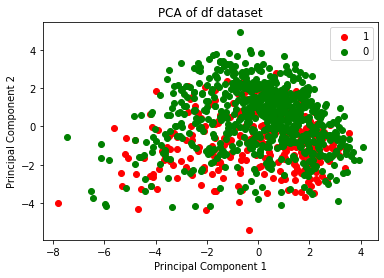

In [52]:
plt.figure()
target_names = df.label
y1 = df.label
for c, i, target_name in zip("rgb", [0, 1], target_names):
    plt.scatter(Y[y1==i,0], Y[y1==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title('PCA of df dataset')
plt.show()

In [53]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(X_std)

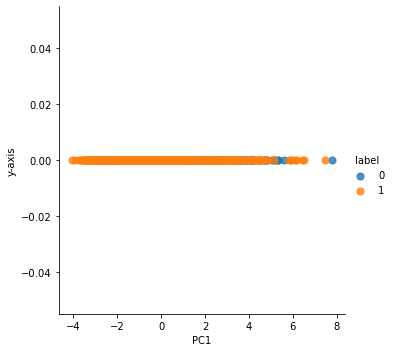

In [54]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [55]:
train_data, test_data, train_label, test_label = train_test_split(x, y, test_size  = 0.2)

In [56]:
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(800, 58)
(200, 58)
(800,)
(200,)


## Normalization

In [57]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  

# Fitting only on training data
scaler.fit(train_data)  
train_data = scaler.transform(train_data)  

# Applying same transformation to test data
test_data = scaler.transform(test_data)

## XGBOOST Model 

In [58]:
model = XGBClassifier()
model.fit(test_data,test_label)
accuracy=model.score(test_data,test_label)
print(accuracy)
predict_label=model.predict(test_data)

1.0


## Classification Report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(test_label, predict_label))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00       135

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
import itertools    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('confusion.png')
#method to print confusion metrix

In [61]:
cm = confusion_matrix(test_label, predict_label)
np.set_printoptions(precision=2)

In [62]:
cm_plot_labels = ['Bad','Good']

Confusion matrix, without normalization
[[ 65   0]
 [  0 135]]


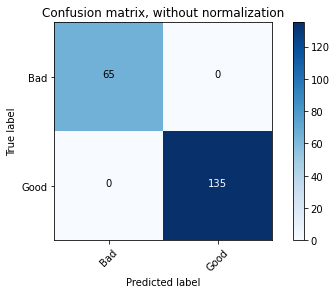

In [63]:
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# AUC Curve

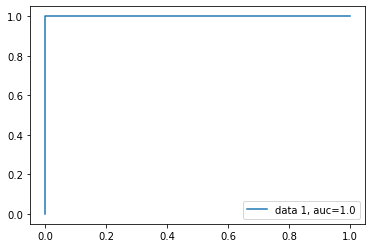

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
y_pred_proba = model.predict_proba(test_data)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_label,  y_pred_proba)
auc = metrics.roc_auc_score(test_label, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.savefig("AUC.png")
plt.show()


# ANN MODEL

In [65]:
y = data_1hot['label']
X = data_1hot.drop(['label'],axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
ann_model = Sequential()
ann_model.add(Dense(activation="relu", input_dim=58, units=15, kernel_initializer="uniform"))
ann_model.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
ann_model.fit(X_train,y_train,batch_size=20,epochs=100)
y_pred = ann_model.predict(X_test) > 0.5
cm = confusion_matrix(y_test,y_pred)

Using TensorFlow backend.


ImportError: cannot import name 'executing_eagerly' from 'tensorflow.python.eager.context' (D:\Users\MY BOOK1\anaconda3\envs\dab\lib\site-packages\tensorflow_core\python\eager\context.py)

In [75]:
roc_auc_score(y_test,y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [300, 1000]

# Naive Bayes

In [68]:
# Searching for models for classifications.
from sklearn.naive_bayes import GaussianNB
# Spliting our data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)
# Initialize our classifier which is naive byers
gnb = GaussianNB()
# Train our classifier
model = gnb.fit(X_train, y_train)
# Make predictions
preds = gnb.predict(X_test)

In [69]:
# Initialize naive byers classifier 
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(y_test, preds))

classification_report
# costs: what do TP, TN, FP, and FN mean for your business?
# which metric would be better suited to your problem: accuracy, precision, recall via classification_report
# understand the concept of FP and FN  for the business.

0.7566666666666667


<function sklearn.metrics._classification.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

# Logistic Regression

In [70]:
# Initialize our classifier which is Logistic Regression
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import pandas as pd
import os
from sklearn.metrics import roc_auc_score
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
print("Score",LR.score(X_train,y_train))

Score 0.7714285714285715


D:\Users\MY BOOK1\anaconda3\envs\dab\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Decision Tree

In [71]:
# Initialize our classifier with decission tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Score",dt.score(X_test,y_test))

# the accuracy which we are getting is not relveant

Score 0.6933333333333334


In [72]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

D:\Users\MY BOOK1\anaconda3\envs\dab\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "D:\Users\MY BOOK1\anaconda3\envs\dab\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-72-aa85ff1d3460>", line 7, in <module>
    import pydotplus
ModuleNotFoundError: No module named 'pydotplus'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\MY BOOK1\anaconda3\envs\dab\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ModuleNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Users\MY BOOK1\anaconda3\envs\dab\lib\site-packages\tensorflow_core\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "D

ModuleNotFoundError: No module named 'pydotplus'

In [73]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=30, max_depth=4,random_state=0)
RFC.fit(X_train,y_train)
print("Accuracy on training set: {:.4f}".format(RFC.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(RFC.score(X_test, y_test)))

Accuracy on training set: 0.7500
Accuracy on test set: 0.7133
